# Desafio Guiado: Regularizacion

### Ejercicio 1: preparar ambiente de trabajo

#### Librerias

In [1]:
# Basicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


# Regularizacion
from sklearn.preprocessing import StandardScaler # normalizar muestra
from sklearn.model_selection import train_test_split # separar muestras train test
from sklearn.linear_model import RidgeCV # modelo ridge
from sklearn.linear_model import LassoCV # modelo lasso
from sklearn.linear_model import ElasticNetCV # modelo elastic net

# indicadores
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [2]:
# funciones personalizadas
from a_exploratorio import graficar_cont, box_scater

In [3]:
# base de datos
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* A simple vista no se ve gran diferencia entre la media y la muestra, sin embargo eso lo debemos analizar de manera visual

### Ejercicio 2: Análisis exploratorio

#### Tipos de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* No hay presencia de NaN

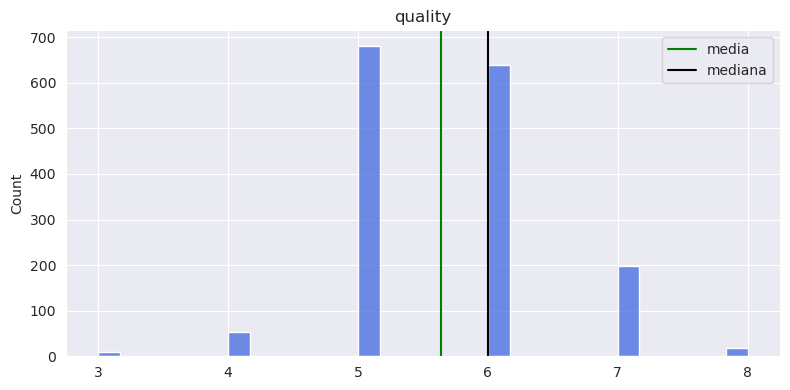

In [6]:
graficar_cont(df, ['quality'], distr='count',figura=(8,4))

* Se observa tendencia central entre los valores 5 y 6, con una mediana mas cercana al 6
* Notar que quality se puede considerar como una variable categorica, con jerarquía donde se asume que va desde 1 al 8.
* No hay valores igual a 1 y 2, partiendo desde el 3 hasta el 8.
* Esto va a afectar el modelo en cuanto al valor de intercepcion con el eje Y

#### Outliers

* Univariados y multi variado

In [7]:
columnas = df.columns
columnas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
len(columnas)

12

* Separar el vector objetivo quality de la lista de parametros

In [9]:
parametros = columnas.tolist()
parametros.remove('quality')

In [10]:
parametros

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

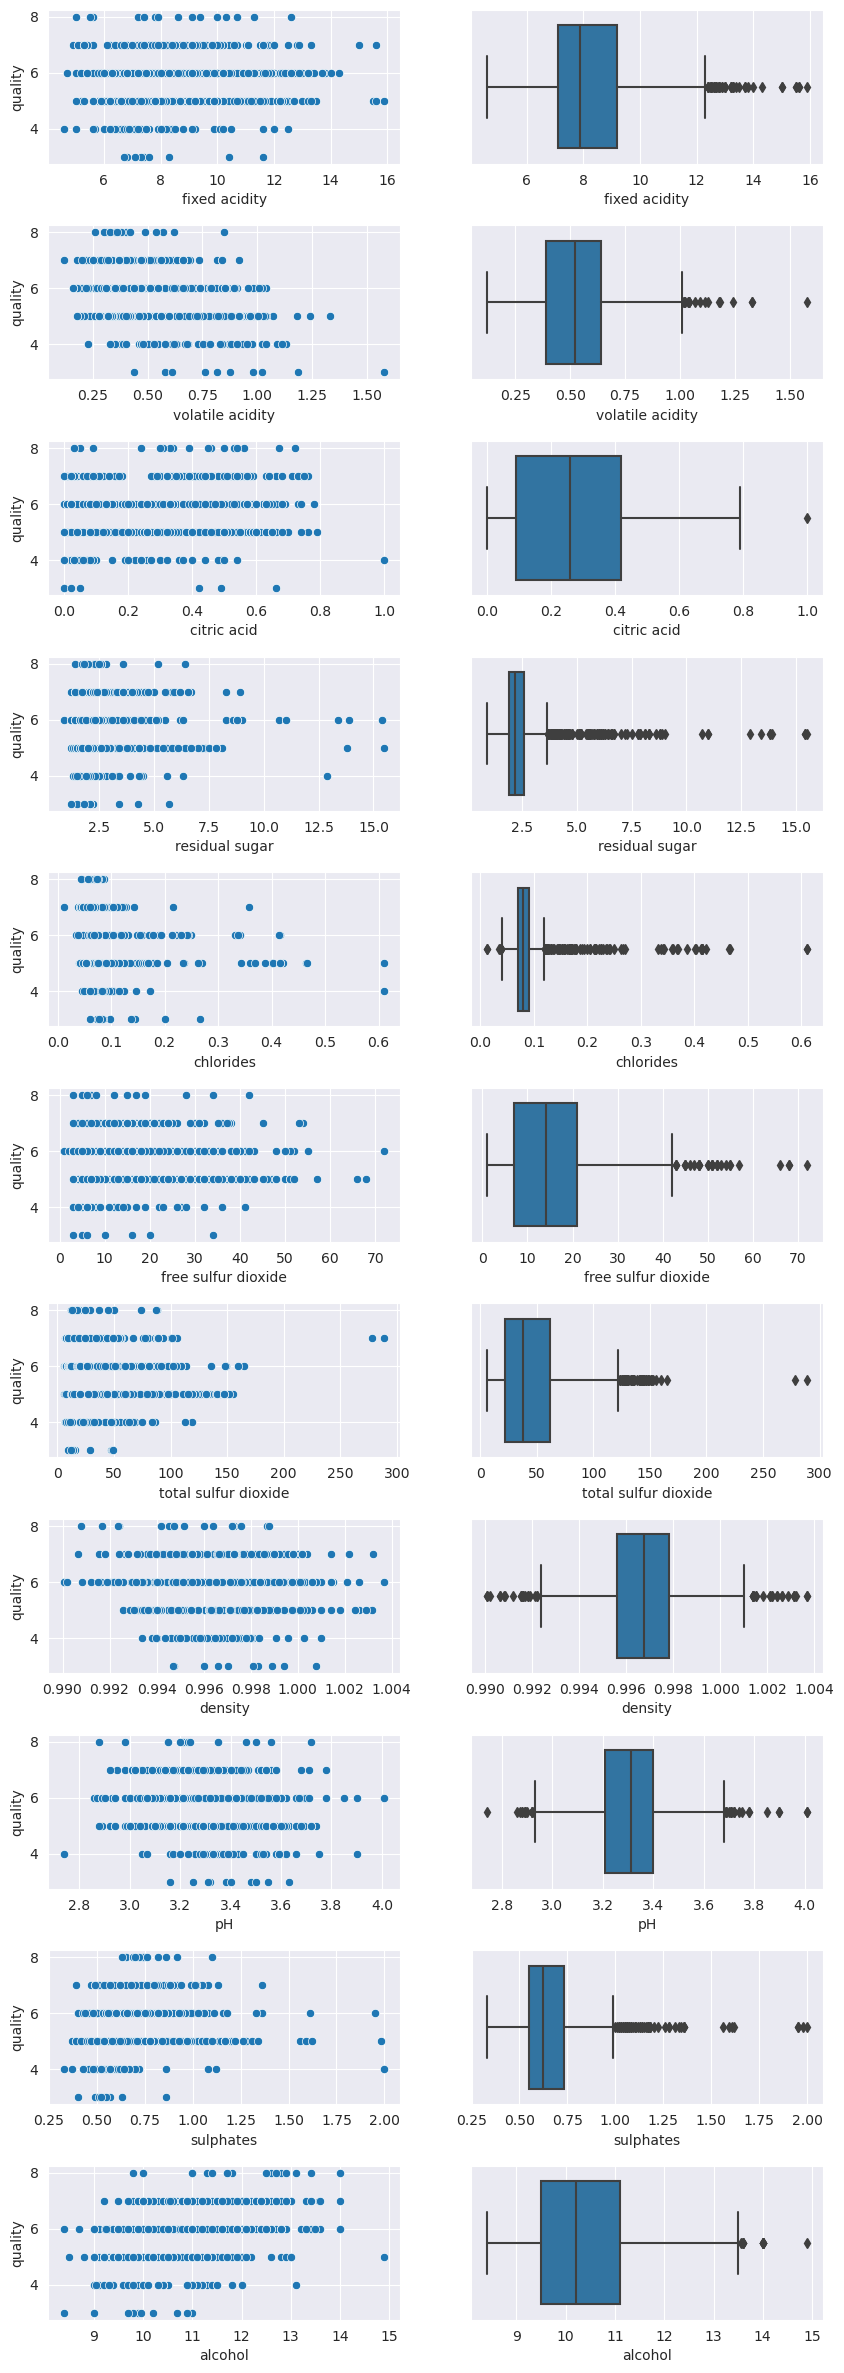

In [11]:
box_scater(df, parametros, 'quality')

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
outliers = ['residual sugar', 'chlorides','total sulfur dioxide','sulphates']

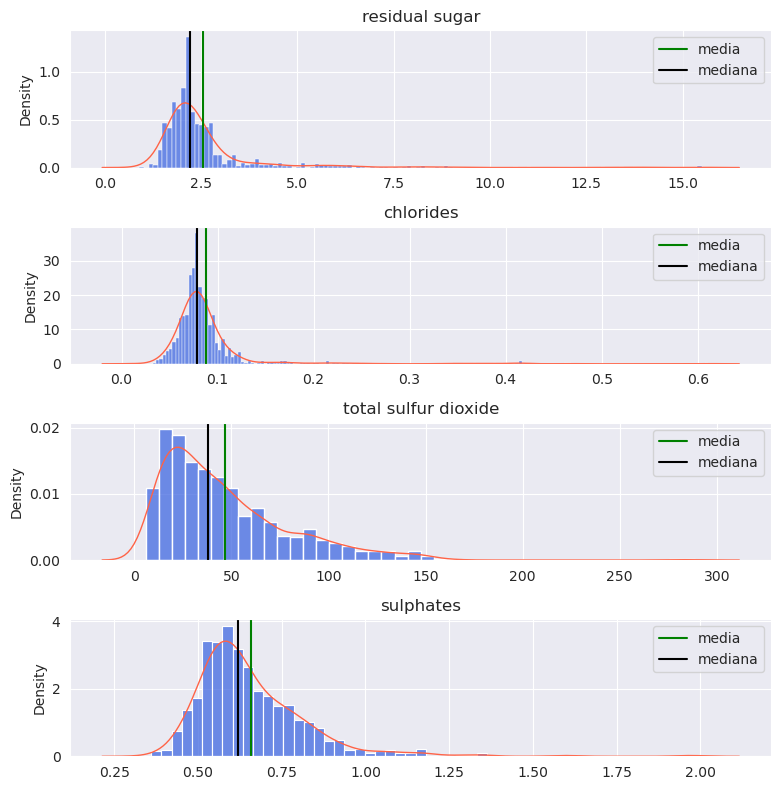

In [14]:
graficar_cont(df, outliers, distr='density',figura=(8,8))

* En residual sugar, chlorides, sulphates y total sulfur son bastante criticos los outliers, con un gran sesgo de la muestra en los valores bajos, y medias afectadas por este efecto.
* Sin embargo si quitamos los outliers el comportamiento tendería a normalizar su comportamiento.
* En general la mayoria de los parametros presentan outliers, y en algunos sesgo a los valores bajos, lo cual puede marcar tendencia si descartamos los outliers o afectar de manera significativa el modelo dado el sesgo provocado.

### Ejercicio 3: Regularizacion de modelos

#### Regularizar variables.

In [15]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

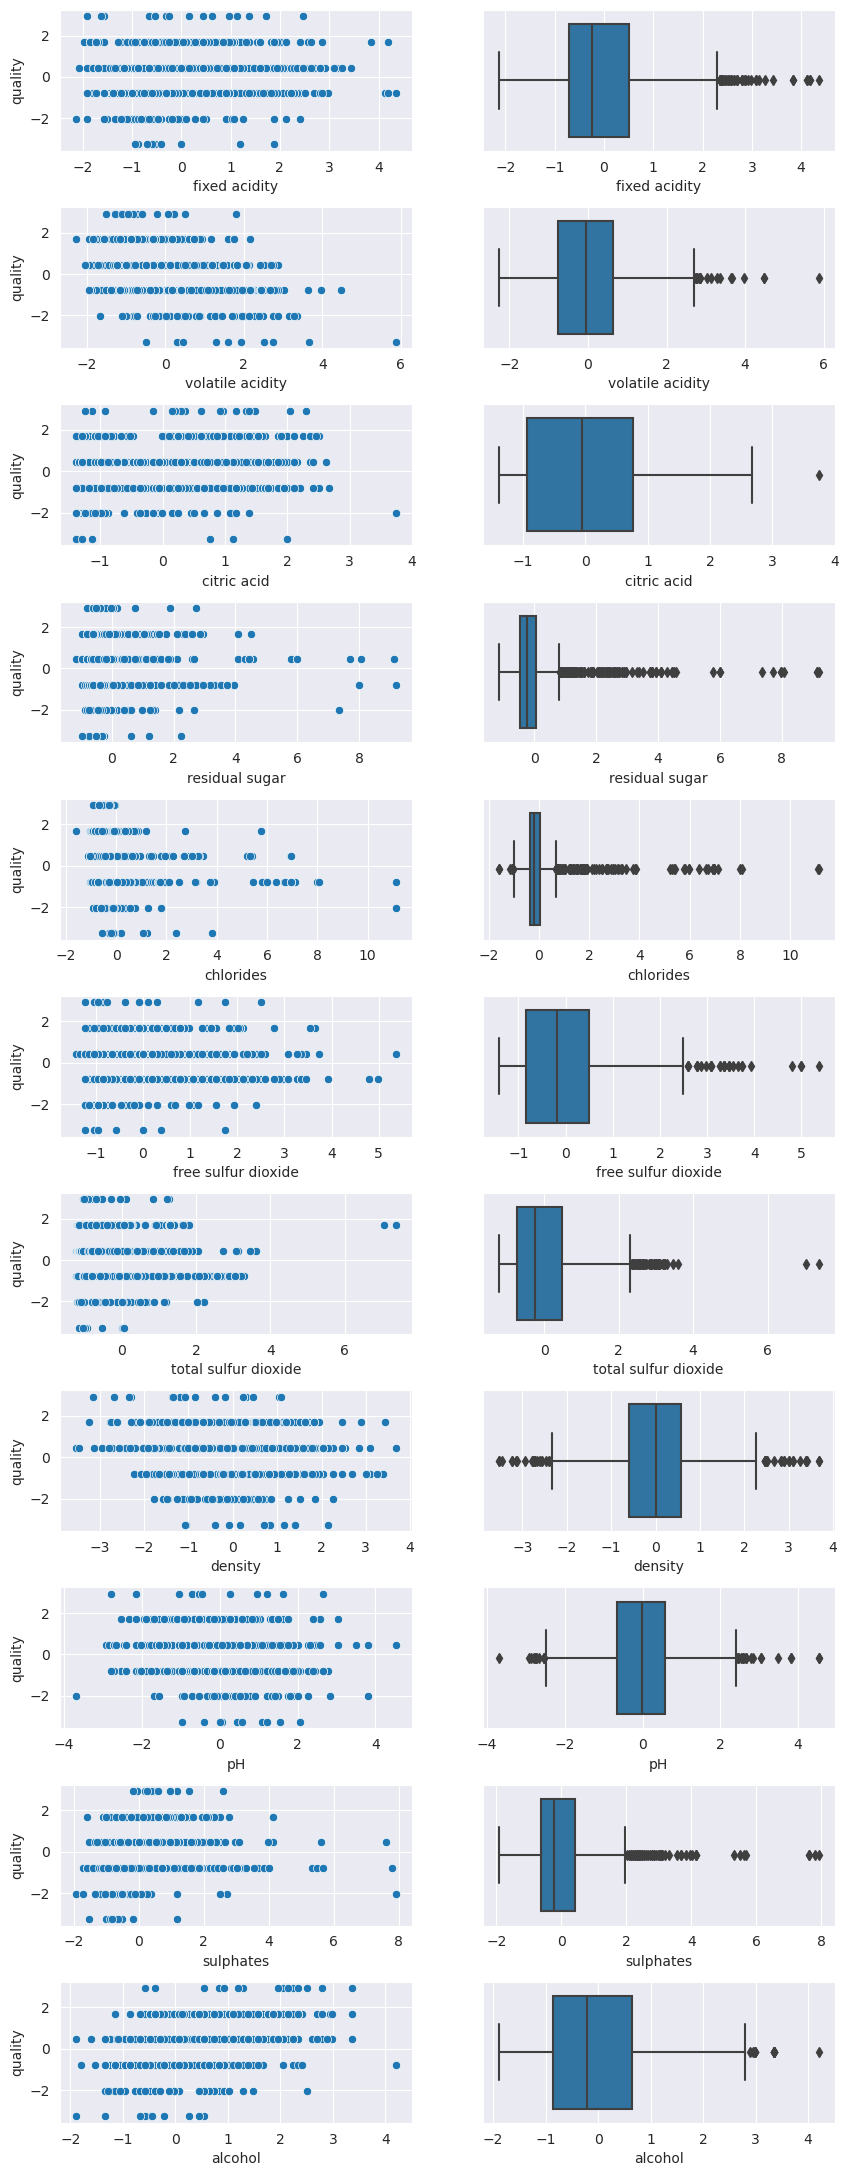

In [16]:
fig = plt.figure(figsize=(10, 30))  # tamaño de la figura
fig.subplots_adjust(hspace=0.4)  # ajuste de las subplots

j=2
n=1
for param in parametros:
    plt.subplot(12,2,n)
    sns.scatterplot(data=df_scaled, y='quality', x=param)
    plt.subplot(12,2,j)
    sns.boxplot(data=df_scaled, x=param)
    j+=2
    n+=2

#### Dividir data

In [17]:
df_scaled_param = df_scaled.loc[:,parametros].copy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled_param, df['quality'],
                                                    shuffle=True, test_size=0.3,
                                                    random_state=1991)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


#### RidgeCV

* Entrenar modelo

In [20]:
alphas = np.logspace(-10, 3, base = 10)
alphas

array([1.00000000e-10, 1.84206997e-10, 3.39322177e-10, 6.25055193e-10,
       1.15139540e-09, 2.12095089e-09, 3.90693994e-09, 7.19685673e-09,
       1.32571137e-08, 2.44205309e-08, 4.49843267e-08, 8.28642773e-08,
       1.52641797e-07, 2.81176870e-07, 5.17947468e-07, 9.54095476e-07,
       1.75751062e-06, 3.23745754e-06, 5.96362332e-06, 1.09854114e-05,
       2.02358965e-05, 3.72759372e-05, 6.86648845e-05, 1.26485522e-04,
       2.32995181e-04, 4.29193426e-04, 7.90604321e-04, 1.45634848e-03,
       2.68269580e-03, 4.94171336e-03, 9.10298178e-03, 1.67683294e-02,
       3.08884360e-02, 5.68986603e-02, 1.04811313e-01, 1.93069773e-01,
       3.55648031e-01, 6.55128557e-01, 1.20679264e+00, 2.22299648e+00,
       4.09491506e+00, 7.54312006e+00, 1.38949549e+01, 2.55954792e+01,
       4.71486636e+01, 8.68511374e+01, 1.59985872e+02, 2.94705170e+02,
       5.42867544e+02, 1.00000000e+03])

In [21]:
ridge_cv = RidgeCV(alphas=alphas, cv = 10)
model_ridge = ridge_cv.fit(X_train, y_train)

* Predicciones

In [22]:
y_hat = model_ridge.predict(X_test)

In [23]:
def report_regularization(model, X_test, y_test):
    print(f'''Lambda: {model.alpha_}
Coeficientes finales: {model.coef_}
------------------------------------    ''')
    y_hat = model.predict(X_test)
    print(f'''R-squared: {r2_score(y_test,y_hat,)}
rMSE (raiz del error cuadrado medio): {mean_squared_error(y_test,y_hat,squared=False)}
MAE (median abs error): {median_absolute_error(y_test,y_hat,)}
''')


In [24]:
report_regularization(ridge_cv, X_test, y_test)

Lambda: 159.9858719606064
Coeficientes finales: [ 0.06967668 -0.13318347  0.01096429  0.02217219 -0.07485879  0.0284053
 -0.10513347 -0.07340463 -0.04161433  0.13519586  0.25648079]
------------------------------------    
R-squared: 0.36870006475788186
rMSE (raiz del error cuadrado medio): 0.652866232052594
MAE (median abs error): 0.393482169247076



#### LassoCV

In [25]:
lasso_cv = LassoCV(alphas=alphas, cv=10)
model_lasso = lasso_cv.fit(X_train, y_train)
y_hat = model_lasso.predict(X_test)
report_regularization(lasso_cv, X_test, y_test)

Lambda: 0.009102981779915227
Coeficientes finales: [ 0.01494094 -0.14642724 -0.          0.         -0.07300823  0.02311867
 -0.10260945 -0.0038697  -0.06955277  0.13259836  0.32267644]
------------------------------------    
R-squared: 0.3712560001310372
rMSE (raiz del error cuadrado medio): 0.6515432663548607
MAE (median abs error): 0.3944679404187226



#### ElasticNetCV

In [26]:
elastic_cv = ElasticNetCV(alphas=alphas, cv=10)
model_elastic = elastic_cv.fit(X_train, y_train)
y_hat = model_elastic.predict(X_test)
report_regularization(elastic_cv, X_test, y_test)

Lambda: 0.0167683293681101
Coeficientes finales: [ 0.02394551 -0.14547638 -0.          0.         -0.07299368  0.02394079
 -0.10242161 -0.01237114 -0.0652158   0.13347544  0.3162895 ]
------------------------------------    
R-squared: 0.3710393293238258
rMSE (raiz del error cuadrado medio): 0.6516555205039523
MAE (median abs error): 0.39232465684423534



* Se observan 3 modelos similares
* la varianza se explica un 37% a las variables el mejor es en Lasso.
* Los errores son similares a igual, sin embargo el menor valor se encuentra en Lasso.
* Los atributos lograron un comportamiento similar en Lasso y elastic, ridge tiene un lambda mucho mas alto al de los demas modelos y no lleva a 0 ningun coeficiente.
* El mejor Lambda se encontro en Lasso dando un RMSE de 0.65154